# Part 3.1: Precipitation Dataset

In this notebook, we will add the daily averaged relative humidity information per subbasin.

#### Datasets

I used E-OBS dataset here and acknowledge the E-OBS dataset and the data providers in the ECA&D project
(https://www.ecad.eu). Cornes, R., G. van der Schrier, E.J.M. van den Besselaar, and P.D. Jones. 2018: An Ensemble
Version of the E-OBS Temperature and Precipitation Datasets, J. Geophys. Res. Atmos., 123.
doi:10.1029/2017JD028200

- Link to datasets (labeled HU): https://surfobs.climate.copernicus.eu/dataaccess/access_eobs_chunks.php


## Basin and subbasin information

We have finalized these geographic boundaries in ML2. We read-in what we saved as a result of that study.

In [1]:
# Read-in the water level dataset and check the content
%matplotlib inline

import netCDF4 as nc
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import numpy as np
import os
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.feature as cfeature
INF_str = "/Users/oncel/Documents/Projects/KoelnPegelML/data/"
# Read-in the netCDF file
INFILE_base = "/Users/oncel/Documents/Projects/KoelnPegelML/data/"

In [2]:
import geopandas as gpd
cologne_catchment = gpd.read_file("Cologne_upstream_catchment.shp")
print(cologne_catchment.head())

    NEXT_SINK    HYBAS_ID   NEXT_DOWN    MAIN_BAS  DIST_SINK  DIST_MAIN  \
0  2080023010  2080399810  2080392830  2080023010      300.6      300.6   
1  2080103570  2080103570  2080472700  2080023010        0.0      788.7   
2  2080109860  2080109860  2080411370  2080023010        0.0      381.2   

   SUB_AREA   UP_AREA   PFAF_ID  ENDO  COAST  ORDER   SORT  \
0    2002.1  145502.9  23261070     0      0      1   6337   
1      36.0      36.0  23267090     2      0      2  25285   
2      10.9      10.9  23261090     2      0      2  25313   

                                            geometry  
0  POLYGON ((6.94804 46.5464, 6.93946 46.54527, 6...  
1  POLYGON ((6.9875 47.18333, 6.98399 47.18423, 6...  
2  POLYGON ((7.24167 50.40417, 7.24167 50.40833, ...  


In [3]:
cologne_subbasins = gpd.read_file("cologne_subbasins_lvl5.shp")
print(cologne_subbasins.head())

   HYBAS_ID_1  NEXT_DOWN_   NEXT_SINK  MAIN_BAS_1  DIST_SINK_  DIST_MAIN_  \
0  2050465610  2050477000  2050008490  2050008490      2372.5      2372.5   
1  2050023010           0  2050023010  2050023010         0.0         0.0   
2  2050023010           0  2050023010  2050023010         0.0         0.0   
3  2050420240  2050023010  2050023010  2050023010       447.8       447.8   
4  2050420340  2050023010  2050023010  2050023010       447.9       447.9   

   SUB_AREA_1  UP_AREA_1  PFAF_ID_1  ENDO_1  ...  DIST_SIN_1  DIST_MAI_1  \
0     50388.9    50388.9      22799       0  ...       300.6       300.6   
1     25335.7   163008.5      23261       0  ...       300.6       300.6   
2     25335.7   163008.5      23261       0  ...         0.0       381.2   
3     28101.2    28101.4      23262       0  ...       300.6       300.6   
4     11589.0   109585.3      23263       0  ...       300.6       300.6   

   SUB_AREA_2  UP_AREA_2  PFAF_ID_2  ENDO_2  COAST_2  ORDER_2  SORT_2  \
0      

In [4]:
# Cologne coordinates
cologne_point = gpd.GeoDataFrame(
    geometry=gpd.points_from_xy([6.96], [50.94]),  # lon, lat
    crs=cologne_catchment.crs
)

## Humidity in the Catchment Area

In [5]:
# Read-in precipitation dataset
INFILE_rr1 = "/Users/oncel/Documents/Projects/KoelnPegelML/data/hu_ens_mean_0.1deg_reg_1995-2010_v31.0e.nc"
INFILE_rr2 = "/Users/oncel/Documents/Projects/KoelnPegelML/data/hu_ens_mean_0.1deg_reg_2011-2024_v31.0e.nc"

<xarray.Dataset> Size: 14GB
Dimensions:    (time: 10958, latitude: 465, longitude: 705)
Coordinates:
  * time       (time) datetime64[ns] 88kB 1995-01-01 1995-01-02 ... 2024-12-31
  * longitude  (longitude) float64 6kB -24.95 -24.85 -24.75 ... 45.35 45.45
  * latitude   (latitude) float64 4kB 25.05 25.15 25.25 ... 71.25 71.35 71.45
Data variables:
    hu         (time, latitude, longitude) float32 14GB nan nan nan ... nan nan
Attributes:
    CDI:          Climate Data Interface version 2.4.0 (https://mpimet.mpg.de...
    Conventions:  CF-1.6
    history:      Thu Mar  6 16:17:11 2025: ncks --no-abc -d time,16436,22279...
    NCO:          netCDF Operators version 5.2.2 (Homepage = http://nco.sf.ne...
    CDO:          Climate Data Operators version 2.4.0 (https://mpimet.mpg.de...
<xarray.DataArray 'hu' (time: 10958, latitude: 465, longitude: 705)> Size: 14GB
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, 

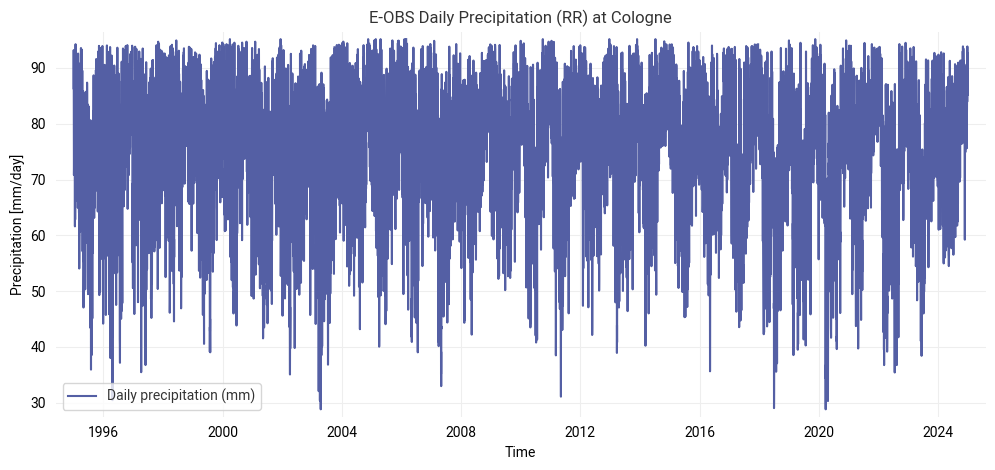

In [6]:
import xarray as xr
# Open the NetCDF file
ds1 = xr.open_dataset(INFILE_rr1) 
ds2 = xr.open_dataset(INFILE_rr2) 
ds = xr.concat([ds1, ds2], dim="time")
print(ds)

# Select variable
rr = ds["hu"]  # daily averaged relative humidity (mm/day)

print(rr)

# Select location
rr_point = rr.sel(latitude=50.94, longitude=6.96, method="nearest")

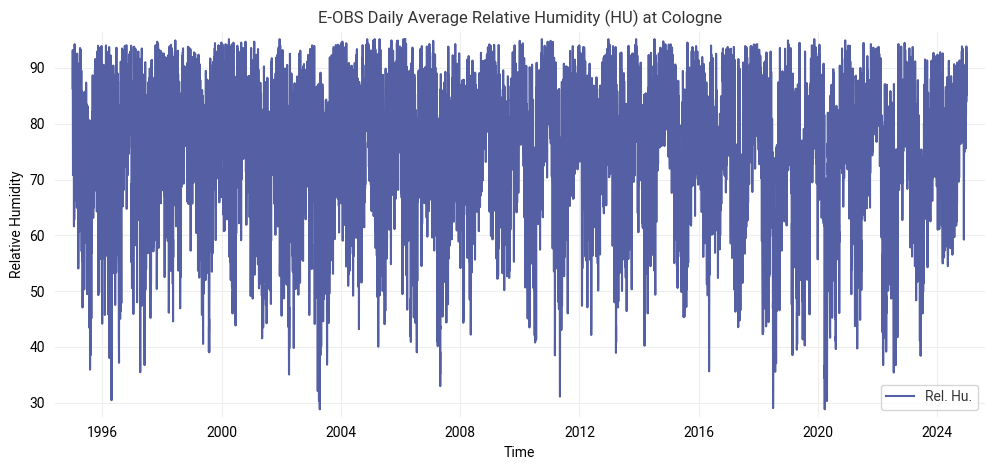

In [8]:
# --- 4. Plot time series ---
plt.figure(figsize=(12,5))
rr_point.plot(label="Rel. Hu.")
plt.title("E-OBS Daily Average Relative Humidity (HU) at Cologne")
plt.xlabel("Time")
plt.ylabel("Relative Humidity")
plt.legend()
plt.grid(True)
plt.show()

In [8]:
print(rr.latitude.values[:5]) 

[25.04986062 25.14986062 25.24986061 25.34986061 25.44986061]


<xarray.DataArray 'hu' (time: 10958, latitude: 70, longitude: 85)> Size: 261MB
array([[[90.611115, 90.805626, 84.3785  , ...,       nan,       nan,
               nan],
        [86.164   , 85.834   , 86.891   , ...,       nan,       nan,
               nan],
        [92.535995, 86.4875  , 83.619   , ..., 81.882996, 81.7025  ,
               nan],
        ...,
        [77.155   , 80.112495, 80.405495, ..., 78.8725  , 79.9975  ,
         78.5495  ],
        [74.114   , 75.932495, 78.0675  , ..., 80.0815  , 79.7775  ,
         80.639   ],
        [72.113   , 73.4305  , 74.937   , ..., 79.6875  , 80.4975  ,
         80.5805  ]],

       [[90.78611 , 90.455   , 86.94474 , ...,       nan,       nan,
               nan],
        [87.5935  , 87.865   , 87.8675  , ...,       nan,       nan,
               nan],
        [92.8725  , 87.631996, 84.841995, ..., 57.990498, 56.6475  ,
               nan],
...
        [86.6005  , 87.7245  , 88.4185  , ..., 93.468575, 92.34214 ,
         92.245   ],
  

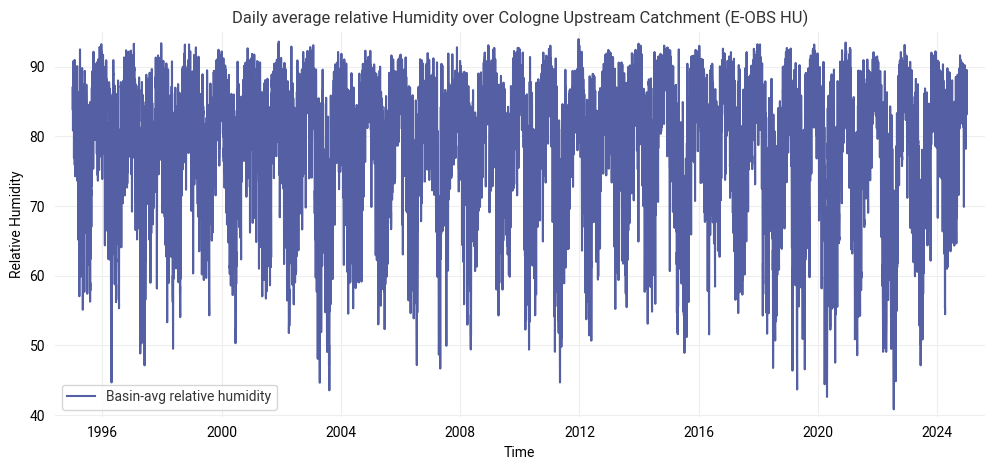

In [10]:
import regionmask
# Load upstream Cologne catchment
cologne_catchment = cologne_catchment.to_crs("EPSG:4326")  # ensure WGS84 lat/lon

# Clip grid to Rhine bounding box for speed
lon_min, lat_min, lon_max, lat_max = cologne_catchment.total_bounds
rr_subset = rr.sel(
    longitude=slice(lon_min-1, lon_max+1),
    latitude=slice(lat_min-1, lat_max+1)  # note: lat is usually decreasing in E-OBS
)
print(rr_subset)
# Create mask from catchment polygon
mask = regionmask.mask_geopandas(cologne_catchment, rr_subset.longitude, rr_subset.latitude)

# Find ID used by regionmask
catchment_id = int(cologne_catchment.index.values[0])
print("Catchment mask ID:", catchment_id)

# Apply mask
rr_cologne = rr_subset.where(mask == catchment_id).mean(dim=["longitude","latitude"])

# Plot
plt.figure(figsize=(12,5))
rr_cologne.plot(label="Basin-avg relative humidity")

plt.title("Daily average relative Humidity over Cologne Upstream Catchment (E-OBS HU)")
plt.xlabel("Time")
plt.ylabel("Relative Humidity")
plt.legend()
plt.grid(True)
plt.show()

Catchment ID: 0.0


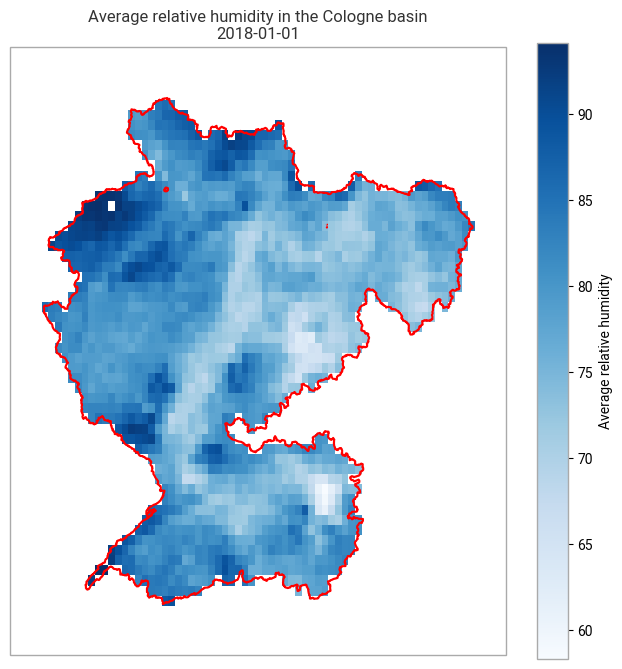

In [12]:
import numpy as np
# ologne upstream basin
import cartopy.crs as ccrs
catchment_id = [v for v in np.unique(mask.values) if ~np.isnan(v)][0]
print("Catchment ID:", catchment_id)

rr_masked = rr.where(mask == catchment_id)

# Select one day of precipitation
day = "2018-01-01"
rr_day = rr_masked.sel(time=day)

# Plot only inside basin
fig, ax = plt.subplots(
    1, 1, figsize=(8, 8),
    subplot_kw=dict(projection=ccrs.PlateCarree())
)

rr_day.plot(
    ax=ax,
    transform=ccrs.PlateCarree(),
    cmap="Blues",
    add_colorbar=True,
    cbar_kwargs=dict(label="Average relative humidity")
)

# Basin outline
cologne_catchment.boundary.plot(ax=ax, edgecolor="red", linewidth=1.5)
minx, miny, maxx, maxy = cologne_catchment.total_bounds
ax.set_extent([minx - 0.5, maxx + 0.5, miny - 0.5, maxy + 0.5], crs=ccrs.PlateCarree())
plt.title(f"Average relative humidity in the Cologne basin\n{day}")
plt.show()

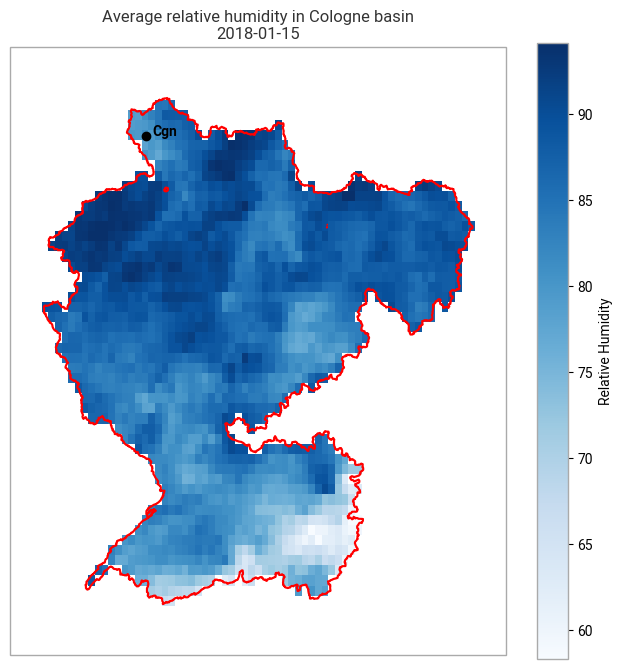

In [14]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import cartopy.crs as ccrs

# Select a 2-week time slice
start = "2018-01-01"
end   = "2018-01-15"
rr_period = rr_masked.sel(time=slice(start, end))

# Prepare figure
fig, ax = plt.subplots(
    1, 1, figsize=(8, 8),
    subplot_kw=dict(projection=ccrs.PlateCarree())
)

# Plot first frame
rr_plot = rr_period.isel(time=0).plot(
    ax=ax,
    transform=ccrs.PlateCarree(),
    cmap="Blues",
    add_colorbar=True,
    cbar_kwargs=dict(label="Relative Humidity")
)

# Cologne coordinates
cologne_lon, cologne_lat = 6.96, 50.94

# Add Cologne as a black point
ax.plot(cologne_lon, cologne_lat, marker="o", color="black",
        markersize=6, transform=ccrs.PlateCarree())

# Add label next to point
ax.text(cologne_lon + 0.1, cologne_lat, "Cgn", color="black",
        fontsize=10, weight="bold", transform=ccrs.PlateCarree())

# Basin outline
cologne_catchment.boundary.plot(ax=ax, edgecolor="red", linewidth=1.5)
minx, miny, maxx, maxy = cologne_catchment.total_bounds
ax.set_extent([minx - 0.5, maxx + 0.5, miny - 0.5, maxy + 0.5], crs=ccrs.PlateCarree())

# Title handle
title = ax.set_title(f"Average relative humidity in Cologne basin\n{str(rr_period.time.values[0])[:10]}")

# Animation update function
def update(frame):
    data = rr_period.isel(time=frame)
    rr_plot.set_array(data.values.flatten())  # update values
    title.set_text(f"Average relative humidity in Cologne basin\n{str(data.time.values)[:10]}")
    return rr_plot, title

# Build animation
anim = animation.FuncAnimation(
    fig, update, frames=len(rr_period.time),
    interval=500, blit=False
)

# Save to file (e.g. MP4 or GIF)
anim.save("outputvisuals/relhumid_cologne_2weeks.gif", writer="pillow", fps=2)

plt.show()

## Subbasins

In [16]:
basins_lvl5_in_cologne = cologne_subbasins
# Subset RR data to bounding box for efficiency
lon_min, lat_min, lon_max, lat_max = basins_lvl5_in_cologne.total_bounds
rr_subset = rr.sel(
    longitude=slice(lon_min-1, lon_max+1),
    latitude=slice(lat_min-1, lat_max+1)
)

# Mask precipitation for each level-5 basin
mask = regionmask.mask_geopandas(basins_lvl5_in_cologne, rr_subset.longitude, rr_subset.latitude)
mask_3D = mask.broadcast_like(rr_subset)

# Stack lat/lon into one dimension
rr_stacked = rr_subset.stack(points=("latitude", "longitude"))

# Align mask with same stacked points
mask_stacked = mask.stack(points=("latitude", "longitude"))

# Group precipitation by sub-basin IDs
rr_subbasins = rr_stacked.groupby(mask_stacked).mean("points")
print(rr_subbasins)


<xarray.DataArray 'hu' (time: 10958, mask: 9)> Size: 394kB
array([[90.04684 , 84.8689  , 86.266655, ..., 85.74188 , 80.46527 ,
        84.51867 ],
       [92.34096 , 89.004555, 85.14979 , ..., 90.26402 , 83.0522  ,
        85.83421 ],
       [88.84688 , 88.02189 , 85.53478 , ..., 88.53432 , 85.0903  ,
        83.526695],
       ...,
       [93.34127 , 93.32213 , 93.388016, ..., 91.25077 , 80.51357 ,
        78.438614],
       [93.502815, 93.00821 , 93.77858 , ..., 92.3238  , 77.92864 ,
        77.130455],
       [91.03046 , 92.27053 , 93.25358 , ..., 87.935295, 75.58623 ,
        73.327896]], shape=(10958, 9), dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 88kB 1995-01-01 1995-01-02 ... 2024-12-31
  * mask     (mask) float64 72B 1.0 3.0 4.0 5.0 6.0 7.0 9.0 10.0 11.0
Attributes:
    standard_name:  relative_humidity
    long_name:      mean relative humidity
    units:          %
    cell_methods:   ensemble: mean


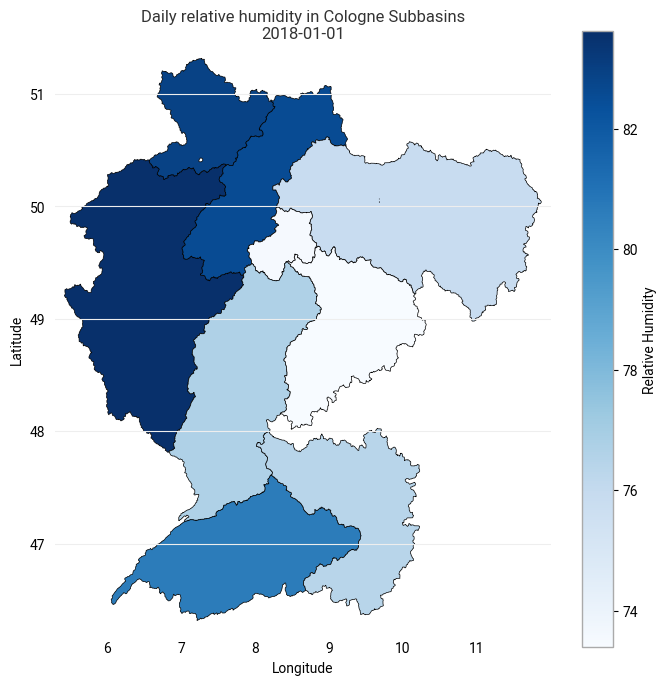

In [17]:
# Date
day = "2018-01-01"
precip_day = rr_subbasins.sel(time=day).to_pandas()

# put into DataFrame: index=subbasin id, value=precip
df_day = precip_day.reset_index()
df_day.columns = ["subbasin_id", "humid"]

# merge with GeoDataFrame
basins_with_precip = basins_lvl5_in_cologne.copy()
basins_with_precip["humid"] = basins_with_precip.index.map(df_day.set_index("subbasin_id")["humid"])

# plot
fig, ax = plt.subplots(figsize=(8,8))
basins_with_precip.plot(
    ax=ax, 
    column="humid", 
    cmap="Blues", 
    legend=True, 
    edgecolor="black", 
    linewidth=0.5,
    legend_kwds={"label": "Relative Humidity"}
)

plt.title(f"Daily relative humidity in Cologne Subbasins\n{day}")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

## Creating training dataset

            sbs_humd_1  sbs_humd_3  sbs_humd_4  sbs_humd_5  sbs_humd_6  \
time                                                                     
1995-01-01   90.046837   84.868896   86.266655   83.184326   83.702698   
1995-01-02   92.340958   89.004555   85.149788   86.105064   84.001930   
1995-01-03   88.846878   88.021889   85.534782   86.318085   84.747704   
1995-01-04   83.947502   84.118141   87.569489   82.972977   85.584785   
1995-01-05   80.265091   82.136017   83.258324   81.236275   78.947029   

            sbs_humd_7  sbs_humd_9  sbs_humd_10  sbs_humd_11  
time                                                          
1995-01-01   81.069901   85.741882    80.465271    84.518669  
1995-01-02   87.506386   90.264023    83.052200    85.834213  
1995-01-03   86.095001   88.534317    85.090302    83.526695  
1995-01-04   82.470398   85.204910    80.336868    79.500076  
1995-01-05   80.288536   82.762222    78.271019    78.295921  


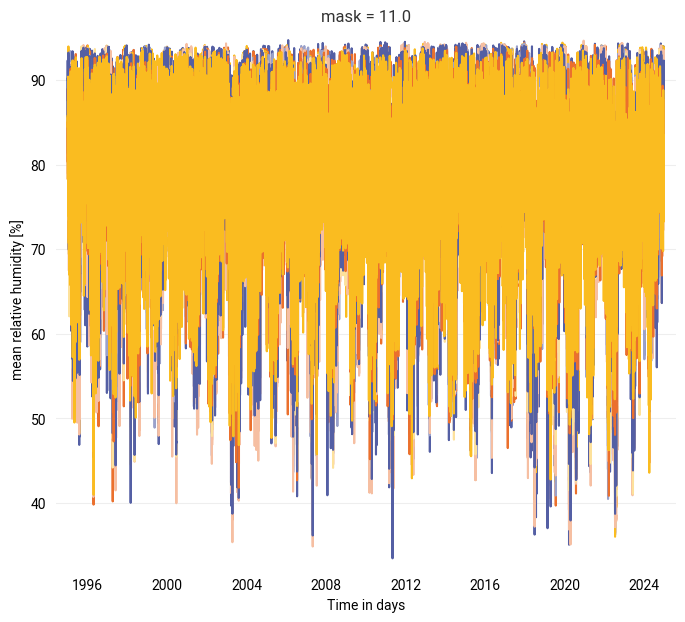

In [19]:
# Convert to wide format: time index, subbasins as columns
df_precip_subbasins = rr_subbasins.to_pandas()

# Rename columns for readability
df_precip_subbasins.columns = [f"sbs_humd_{int(c)}" for c in df_precip_subbasins.columns]

print(df_precip_subbasins.head())

for basin_id in rr_subbasins["mask"].values:
    if np.isnan(basin_id):  # skip outside pixels
        continue
    rr_subbasins.sel(mask=basin_id).plot(label=f"Subbasin {int(basin_id)}")



In [20]:
# Check the df
df_precip_subbasins

,sbs_humd_1,sbs_humd_3,sbs_humd_4,sbs_humd_5,sbs_humd_6,sbs_humd_7,sbs_humd_9,sbs_humd_10,sbs_humd_11
time,,,,,,,,,
1995-01-01,90.046837,84.868896,86.266655,83.184326,83.702698,81.069901,85.741882,80.465271,84.518669
1995-01-02,92.340958,89.004555,85.149788,86.105064,84.001930,87.506386,90.264023,83.052200,85.834213
1995-01-03,88.846878,88.021889,85.534782,86.318085,84.747704,86.095001,88.534317,85.090302,83.526695
1995-01-04,83.947502,84.118141,87.569489,82.972977,85.584785,82.470398,85.204910,80.336868,79.500076
1995-01-05,80.265091,82.136017,83.258324,81.236275,78.947029,80.288536,82.762222,78.271019,78.295921
...,...,...,...,...,...,...,...,...,...
2024-12-27,80.760010,81.415894,85.654205,85.552391,86.103889,85.435410,82.534615,80.501358,81.160164
2024-12-28,80.857513,87.975647,87.855942,90.019646,92.748962,88.034256,87.942604,80.558403,80.953796
2024-12-29,93.341270,93.322128,93.388016,93.090889,93.543579,90.422371,91.250771,80.513573,78.438614


In [25]:
test1 = df_precip_subbasins[df_precip_subbasins["sbs_humd_1"] < 0]
test1

,sbs_humd_1,sbs_humd_3,sbs_humd_4,sbs_humd_5,sbs_humd_6,sbs_humd_7,sbs_humd_9,sbs_humd_10,sbs_humd_11
time,,,,,,,,,


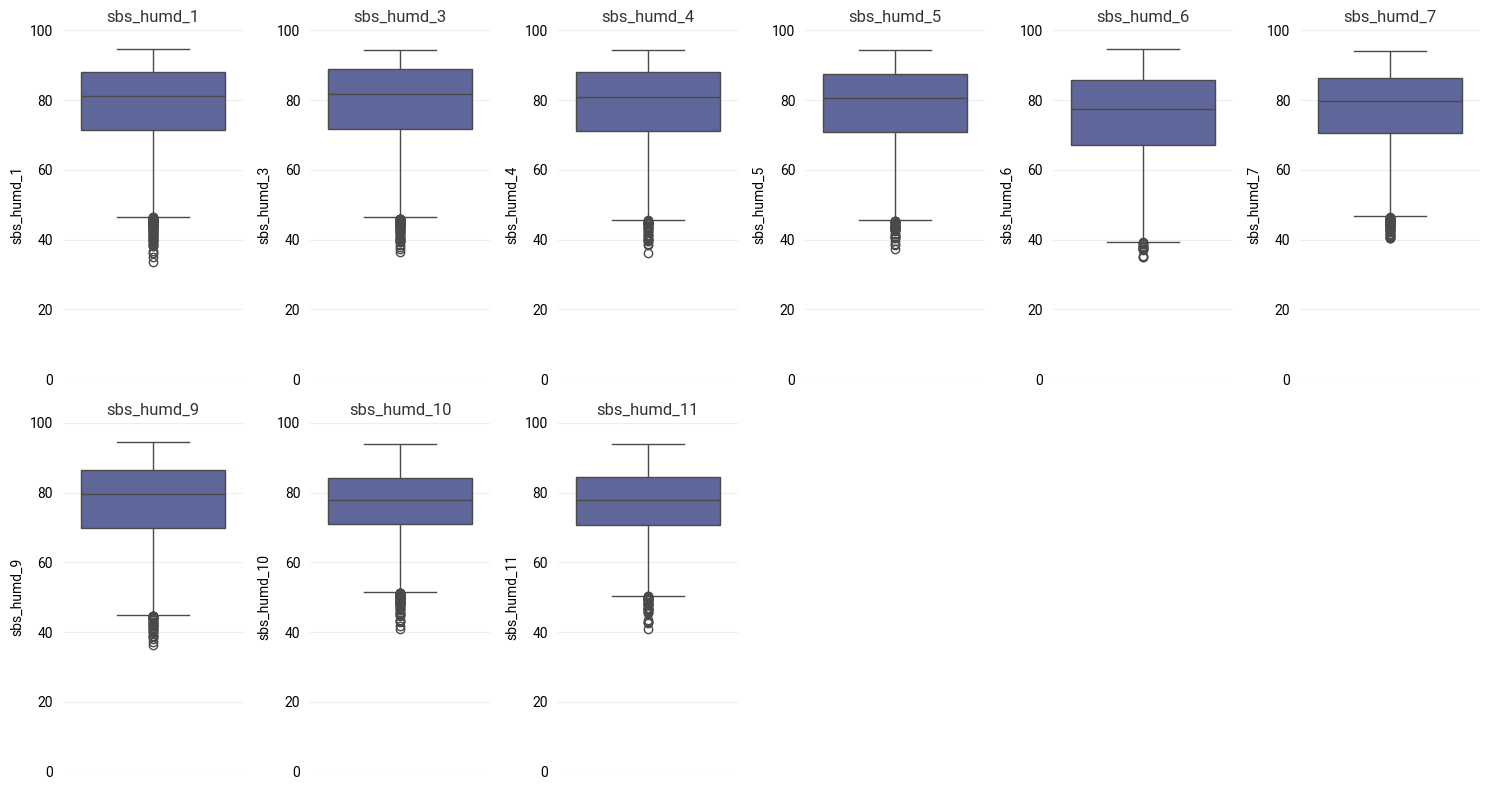

In [26]:
# Check the distributions
import math
import seaborn as sns
ncols = 6
nrows = math.ceil(len(df_precip_subbasins.columns) / ncols)
fig, axes = plt.subplots(nrows, ncols, figsize=(15, nrows*4))

for ax, col in zip(axes.flat, df_precip_subbasins.columns):
    #sns.violinplot(y=df_precip_subbasins[col], ax=ax) goes to minimum although there is no minimum
    sns.boxplot(y=df_precip_subbasins[col], ax=ax)
    ax.set_title(col)
    #ax.set_yscale("log")                 # log scale
    ax.set_ylim(0,100)              # fixed limits across all plots

# Hide empty subplots
for ax in axes.flat[len(df_precip_subbasins.columns):]:
    ax.set_visible(False)

plt.tight_layout()
plt.show()

## Creating training dataset

In [27]:
# Create dataset
df_precip_subbasins.to_csv("training_datasets/train_humd_preprocessed.csv", index=True)  # keep index if it's meaningful
print(df_precip_subbasins)

            sbs_humd_1  sbs_humd_3  sbs_humd_4  sbs_humd_5  sbs_humd_6  \
time                                                                     
1995-01-01   90.046837   84.868896   86.266655   83.184326   83.702698   
1995-01-02   92.340958   89.004555   85.149788   86.105064   84.001930   
1995-01-03   88.846878   88.021889   85.534782   86.318085   84.747704   
1995-01-04   83.947502   84.118141   87.569489   82.972977   85.584785   
1995-01-05   80.265091   82.136017   83.258324   81.236275   78.947029   
...                ...         ...         ...         ...         ...   
2024-12-27   80.760010   81.415894   85.654205   85.552391   86.103889   
2024-12-28   80.857513   87.975647   87.855942   90.019646   92.748962   
2024-12-29   93.341270   93.322128   93.388016   93.090889   93.543579   
2024-12-30   93.502815   93.008209   93.778580   93.492249   92.722527   
2024-12-31   91.030457   92.270531   93.253578   92.736717   92.109413   

            sbs_humd_7  sbs_humd_9  s